## (K-Nearest-Neighbor model)

In [7]:
import numpy as np
names = ['Area', 'Perimeter', 'Compactness', 'Kernel_len', 'Kernel_wid', 'Asymmetry_coef', 'Groove_len', 'Class']
f = open('C:\MAE551_HW5_Prob1\seeds_dataset.txt', 'r')
instances = []
labels = []
for line in f:
    instance_and_label = [float(x) for x in line.split()]
    labels.append(instance_and_label.pop())
    instances.append(instance_and_label)
x = np.array(instances)
y = np.array(labels)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
# Evaluate accuracy

from sklearn.neighbors import KNeighborsClassifier
import math
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(round(float(sum(pred==y_test))/len(y_test),2))

0.93


The optimal number of neighbors is 10


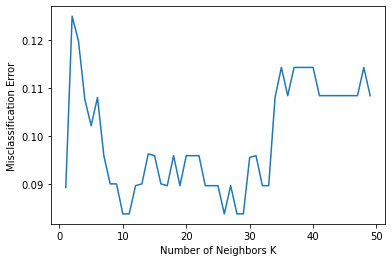

In [17]:
from sklearn.model_selection import cross_val_score
mylist = list(range(1,50))
cv_scores = []
for k in mylist:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
import matplotlib.pyplot as plt
error = [1 - x for x in cv_scores]

optimal_k = mylist[error.index(min(error))]
print("The optimal number of neighbors is %d" % optimal_k)

plt.plot(mylist, error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [19]:
import math
import random

def euclidean_squared(p1, p2):
    return sum([abs(x-y)**2 for (x, y) in zip(p1, p2)])

def knn_classifier(test_data_point, train_data, train_labels, k, possible_labels):
    """ Implements K Nearest Neighbors classification

    Find K nearest neighbors of point in train_data. Then
    the most frequently appearing train_labels (among the labels
    of these neighbors) are calculated. If there are 
    more than one with max frequency, then return one at random.

    possible_labels is the number of possible labels.
    (Possible labels are assumed to be 1, ..., possible_labels.)
    """

    # compute distances of training examples to this point
    distances = [math.sqrt(euclidean_squared(x, test_data_point)) for x in train_data]

    # put distances, taining examples and training labels together
    all_three = zip(distances, train_data, train_labels)

    # sort the triples by distances
    all_three_sorted = sorted(all_three, key = lambda x: x[0])

    # after sorting extract the labels from the first k triples
    nearest_k_labels = [x[2] for x in all_three_sorted[0:k]]

    # initialize label frequencies to 0's
    freq = [0]*(possible_labels + 1)

    # compute labels frequencies in nearest_k_labels
    for label in range(1, possible_labels + 1):
        freq[label] = len([x for x in nearest_k_labels if x == label])

    # find the labels that have maximum frequency
    max_freq = max(freq)
    max_freq_labels = [x for x in range(possible_labels + 1) if freq[x] == max_freq]

    # if there are several labels with max frequency,
    # return one of them at random
    return random.choice(max_freq_labels)

pred = []
for i in range(len(x_test)):
    a = knn_classifier(x_test[i], x_train, y_train, 1, 3)
    pred.append(a)
print(pred)

[3, 2, 1, 2, 2, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 2, 1, 3, 3, 2, 1, 1, 3, 1, 3, 1, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 1, 2, 3, 2, 3]


K=1, the accuracy=0.9 <br>
K=2, the accuracy=0.95 <br>
K=3, the accuracy=0.9 <br>
K=4, the accuracy=0.95 <br>
K=5, the accuracy=0.88 <br>
K=6, the accuracy=0.95 <br>
K=7, the accuracy=0.88 <br>
K=8, the accuracy=0.98 <br>
K=9, the accuracy=0.9 <br>
K=10, the accuracy=0.93 <br>
K=11, the accuracy=0.9 <br>
K=12, the accuracy=0.93 <br>
K=13, the accuracy=0.86 <br>
K=14, the accuracy=0.95 <br>
K=15, the accuracy=0.9 <br>
<br>
So far, when K = 2, 4, 6, and 14, the testing accuracy is the hightest. 

## (K-Means Clustering model)

In [40]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as pl
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans


In [44]:
data = pd.read_csv('C:\MAE551_HW5_Prob2\Live_20210128.csv')
print(data.shape)
data.head()


(7050, 16)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [45]:
missing = data.isnull().sum()

print(missing)

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [46]:
# remove the last 4 columns
features = list(data.columns)[:-4]

df = data[features]

In [47]:
missing = df.isnull().sum()
print(missing)

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


In [48]:
df.shape


(7050, 12)

In [49]:
# the new dataset
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [52]:
df['status_published'] = pd.to_datetime(df['status_published'])
df

C:\Users\Hsiao-ping.ni\AppData\Local\Temp\ipykernel_45184\3746103173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status_published'] = pd.to_datetime(df['status_published'])


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0
7046,7047,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0
7047,7048,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0
7048,7049,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0


In [53]:
df['year'] = df['status_published'].dt.year
df['month'] = df['status_published'].dt.month
df['day'] = df['status_published'].dt.day
df['hour'] = df['status_published'].dt.hour

C:\Users\Hsiao-ping.ni\AppData\Local\Temp\ipykernel_45184\3330780686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['status_published'].dt.year
C:\Users\Hsiao-ping.ni\AppData\Local\Temp\ipykernel_45184\3330780686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['status_published'].dt.month
C:\Users\Hsiao-ping.ni\AppData\Local\Temp\ipykernel_45184\3330780686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [64]:
df = df.drop(['num_reactions', 'num_loves', 'year', 'num_comments'], axis=1)


In [65]:
s_type = {'video': 1,'photo': 2, 'status': 3,'link': 4}


In [70]:
df.status_type = [s_type[item] for item in df.status_type]


KeyError: 1

In [68]:
df = df.drop('status_published', axis=1)


In [69]:
df.head(10)


,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,day,hour
0,1,262,432,3,1,1,0,4,22,6
1,2,0,150,0,0,0,0,4,21,22
2,1,57,204,1,1,0,0,4,21,6
3,2,0,111,0,0,0,0,4,21,2
4,2,0,204,0,0,0,0,4,18,3
5,2,0,211,1,0,0,0,4,18,2
6,1,72,418,10,2,0,3,4,18,0
7,1,53,260,1,1,0,1,4,17,7
8,2,0,198,0,0,0,0,4,17,3
9,2,1,167,0,0,0,0,4,11,4


In [82]:
X = df

y = df['status_type']

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [84]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   status_type  7050 non-null   int64
 1   num_shares   7050 non-null   int64
 2   num_likes    7050 non-null   int64
 3   num_wows     7050 non-null   int64
 4   num_hahas    7050 non-null   int64
 5   num_sads     7050 non-null   int64
 6   num_angrys   7050 non-null   int64
 7   month        7050 non-null   int64
 8   day          7050 non-null   int64
 9   hour         7050 non-null   int64
 10  Clusters     7050 non-null   int32
dtypes: int32(1), int64(10)
memory usage: 578.4 KB


In [85]:
X.head()


,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,day,hour,Clusters
0,0,262,432,3,1,1,0,4,22,6,0
1,1,0,150,0,0,0,0,4,21,22,0
2,0,57,204,1,1,0,0,4,21,6,0
3,1,0,111,0,0,0,0,4,21,2,0
4,1,0,204,0,0,0,0,4,18,3,0


In [86]:
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
ms = MinMaxScaler()

X = ms.fit_transform(X)

In [88]:
X = pd.DataFrame(X, columns=[cols])
X.head()


,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,day,hour,Clusters
0,0.000000,0.076519,0.091720,0.010791,0.006369,0.019608,0.0,0.272727,0.700000,0.260870,0.0
1,0.333333,0.000000,0.031847,0.000000,0.000000,0.000000,0.0,0.272727,0.666667,0.956522,0.0
2,0.000000,0.016647,0.043312,0.003597,0.006369,0.000000,0.0,0.272727,0.666667,0.260870,0.0
3,0.333333,0.000000,0.023567,0.000000,0.000000,0.000000,0.0,0.272727,0.666667,0.086957,0.0
4,0.333333,0.000000,0.043312,0.000000,0.000000,0.000000,0.0,0.272727,0.566667,0.130435,0.0


C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Hsiao-p

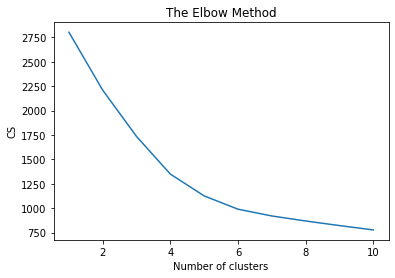

In [90]:
# Use elbow method to find optimal number of clusters

from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [97]:
# K-Means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 3204 out of 7050 samples were correctly labeled.
Accuracy score: 0.45


C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [91]:
# K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 2306 out of 7050 samples were correctly labeled.
Accuracy score: 0.33


C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [92]:
# K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1692 out of 7050 samples were correctly labeled.
Accuracy score: 0.24


C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [94]:
# K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1925 out of 7050 samples were correctly labeled.
Accuracy score: 0.27


C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [95]:
# K-Means model with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1171 out of 7050 samples were correctly labeled.
Accuracy score: 0.17


C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


It seems that K=2 is the optimal K value since it is achieved a relatively high accuracy of 45%.

## (Self-organizing Map)

In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:\MAE551_HW5_Prob3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\MAE551_HW5_Prob3\HW4_P1_Iris.csv


In [109]:
import pandas as pd
import numpy as np
%matplotlib inline

In [117]:
df = pd.read_csv(r'C:\MAE551_HW5_Prob3\HW4_P1_Iris.csv')
df.head()
df = df.iloc[:,:-1]
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [118]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = feature_scaler.fit_transform(df)
df_scaled = pd.DataFrame(data=df_scaled)
df_scaled.head()

,0,1,2,3,4
0,0.000000,0.222222,0.625000,0.067797,0.041667
1,0.006711,0.166667,0.416667,0.067797,0.041667
2,0.013423,0.111111,0.500000,0.050847,0.041667
3,0.020134,0.083333,0.458333,0.084746,0.041667
4,0.026846,0.194444,0.666667,0.067797,0.041667


In [119]:
som_width = 8
som_length = 8
epochs = 10000
initial_learning_rate=0.01
np.random.seed(10)

In [120]:
raws,cols = df_scaled.shape
print("Data set raw count=%d column count=%d" %(raws, cols))

Data set raw count=150 column count=5


In [121]:
initial_radius = max(som_width, som_length)/2
time_constant =  epochs/np.log(initial_radius)

In [122]:
som_net = np.random.random((som_width, som_length, cols))
print("Initial weights set to SOM network:")
print(som_net)

Initial weights set to SOM network:
[[[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701]
  [0.22479665 0.19806286 0.76053071 0.16911084 0.08833981]
  [0.68535982 0.95339335 0.00394827 0.51219226 0.81262096]
  [0.61252607 0.72175532 0.29187607 0.91777412 0.71457578]
  [0.54254437 0.14217005 0.37334076 0.67413362 0.44183317]
  [0.43401399 0.61776698 0.51313824 0.65039718 0.60103895]
  [0.8052232  0.52164715 0.90864888 0.31923609 0.09045935]
  [0.30070006 0.11398436 0.82868133 0.04689632 0.62628715]]

 [[0.54758616 0.819287   0.19894754 0.8568503  0.35165264]
  [0.75464769 0.29596171 0.88393648 0.32551164 0.1650159 ]
  [0.39252924 0.09346037 0.82110566 0.15115202 0.38411445]
  [0.94426071 0.98762547 0.45630455 0.82612284 0.25137413]
  [0.59737165 0.90283176 0.53455795 0.59020136 0.03928177]
  [0.35718176 0.07961309 0.30545992 0.33071931 0.7738303 ]
  [0.03995921 0.42949218 0.31492687 0.63649114 0.34634715]
  [0.04309736 0.87991517 0.76324059 0.87809664 0.41750914]]

 [[0.60557756 0.

In [123]:
def update_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

def update_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)

def calculate_euclidian_dis(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [136]:
def find_best_matching_Unit(data_point):
    bmu_pos = np.array([0, 0])
    min_dist = np.iinfo(np.int).max
    input_dim = len(data_point)
    
    for x in range(som_width):
        for y in range(som_length):
            som_weight_vector = som_net[x, y, :].reshape(1, 5)
            euclidian_dist = calculate_euclidian_dis(som_weight_vector, data_point)
            if euclidian_dist < min_dist:
                min_dist = euclidian_dist
                bmu_pos = np.array([x, y])
    
    bmu = som_net[bmu_pos[0], bmu_pos[1], :].reshape(1, 5)
    return (bmu, bmu_pos)

In [137]:
def neighbourhood_function(bmu_location, selected_node_location, radius):
    euclidien_dist_to_bmu = calculate_euclidian_dis(bmu_location, selected_node_location)
    return np.exp(-euclidien_dist_to_bmu / (2* (radius**2)))

In [138]:
# Train SOM network with Iris data set

#shuffle data set
df_scaled = df_scaled.sample(frac=1)

rad_values = list()
learn_rates_values = list()
rad_values.append(initial_radius)
learn_rates_values.append(initial_learning_rate)

for i in range(epochs):
    data_point = np.array(df_scaled.sample())
    bmu, bmu_idx = find_best_matching_Unit(data_point)

    r_new = update_radius(initial_radius, i, time_constant)
    new_learning_rate = update_learning_rate(initial_learning_rate, i, epochs)
    
    rad_values.append(r_new)
    learn_rates_values.append(new_learning_rate)
    
    for x in range(som_width):
        for y in range(som_length):
            w = som_net[x, y, :].reshape(1, 5)
            w_dist = calculate_euclidian_dis(np.array([x, y]), bmu_idx)
            
            if w_dist <= r_new:
                influence = neighbourhood_function(bmu, w, r_new)
                new_w = w + (new_learning_rate * influence * (data_point - w))
                som_net[x, y, :] = new_w.reshape(1, 5)

C:\Users\Hsiao-ping.ni\AppData\Local\Temp\ipykernel_45184\803998366.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  min_dist = np.iinfo(np.int).max


Text(0.5, 1.0, 'Radius values')

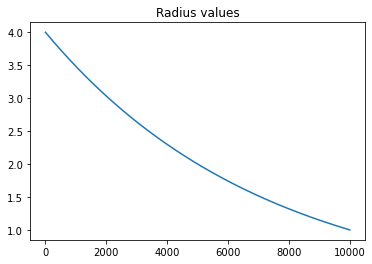

In [139]:
from matplotlib import pyplot as plt
plt.plot(rad_values)
plt.title('Radius values')

Text(0.5, 1.0, 'Learning Rates values')

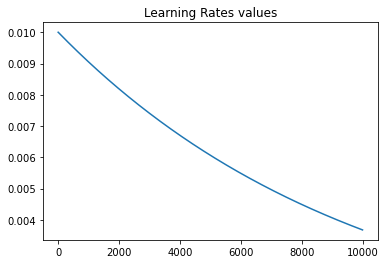

In [140]:
plt.plot(learn_rates_values)
plt.title('Learning Rates values')

In [146]:
u_matrix = np.zeros((som_width-1, som_length-1))

for x in range(1, som_width):
    for y in range(1, som_length):
        neighbour_list = list()
        print("-"* 100)
        print("neighbour cordinates of x=%d, y=%d" %(x,y))
        for u in range(x-1, x+2):
            if (u < 0 or u > (som_width-1)):
                continue
            for v in range(y-1, y+2):
                if(v < 0 or v > (som_length-1)):
                    continue
                if (u == x and v == y):
                    continue
                neighbour_list.append(np.array([u,v]))
                print(u,v)
        sum=0
        for idx in neighbour_list:
            sum += calculate_euclidian_dis(som_net[x,y,:], som_net[idx[0],idx[1],:])
        
        avg = sum/len(neighbour_list)
        print("Sum of distance to neighbour weights=%f, average=%f" % (sum, avg))     
        u_matrix[x-1,y-1] = avg

----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=1
0 0
0 1
0 2
1 0
1 2
2 0
2 1
2 2
Sum of distance to neighbour weights=1.198052, average=0.149756
----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=2
0 1
0 2
0 3
1 1
1 3
2 1
2 2
2 3
Sum of distance to neighbour weights=1.516744, average=0.189593
----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=3
0 2
0 3
0 4
1 2
1 4
2 2
2 3
2 4
Sum of distance to neighbour weights=2.029605, average=0.253701
----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=4
0 3
0 4
0 5
1 3
1 5
2 3
2 4
2 5
Sum of distance to neighbour weights=2.532959, average=0.316620
--------------------------------------------------------------------------------

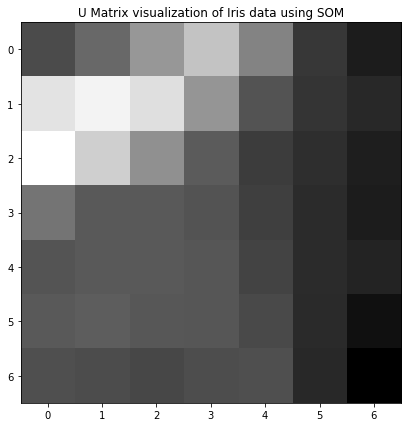

In [147]:
fig = plt.figure(figsize=(7,7))
plt.title("U Matrix visualization of Iris data using SOM")
plt.imshow(u_matrix, cmap="gray")
plt.show()
fig.savefig('U_Matrix_iris.png')

## (Gaussian Mixture Model)

In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [129]:
raw_df = pd.read_csv('C:\MAE551_HW5_Prob4\HW5_P4_CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [130]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827


In [148]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(X_principal)

GaussianMixture(n_components=3)

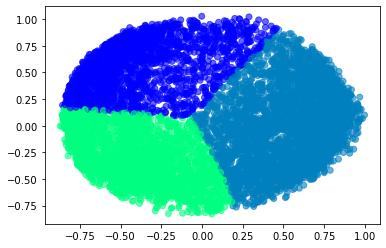

In [149]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 

In [150]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [151]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        labels=gmm.predict(X_principal)
        sil=metrics.silhouette_score(X_principal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

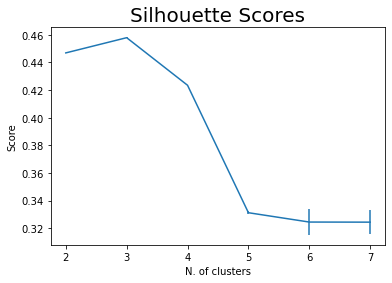

In [152]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [153]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [154]:
n_clusters=np.arange(2, 8)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(X_principal, test_size=0.5)
        
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Hsiao-ping.ni\Anaconda3\lib\site-packages\skle

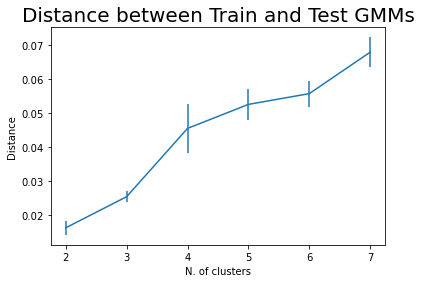

In [155]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

The lower the distance, the better the cluster.

In [156]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        
        tmp_bic.append(gmm.bic(X_principal))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

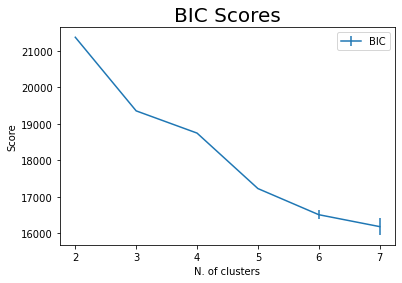

In [157]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

The bigger the number of clusters, the better should be the model. 

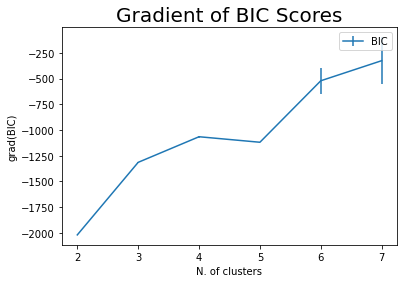

In [158]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

## (Hierarchical Clustering Model)

In [159]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# las de clustering 
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

In [160]:
datacredit = pd.read_csv("C:\MAE551_HW5_Prob4\HW5_P4_CC GENERAL.csv")
datacredit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [161]:
# the columns with nas
datacredit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [162]:
#fill the na's on the dataset with the mean of each columns

mp_mean = datacredit['MINIMUM_PAYMENTS'].mean()
datacredit['MINIMUM_PAYMENTS'].fillna(value = mp_mean, inplace = True)
datacredit['CREDIT_LIMIT'].fillna(value = mp_mean, inplace = True)

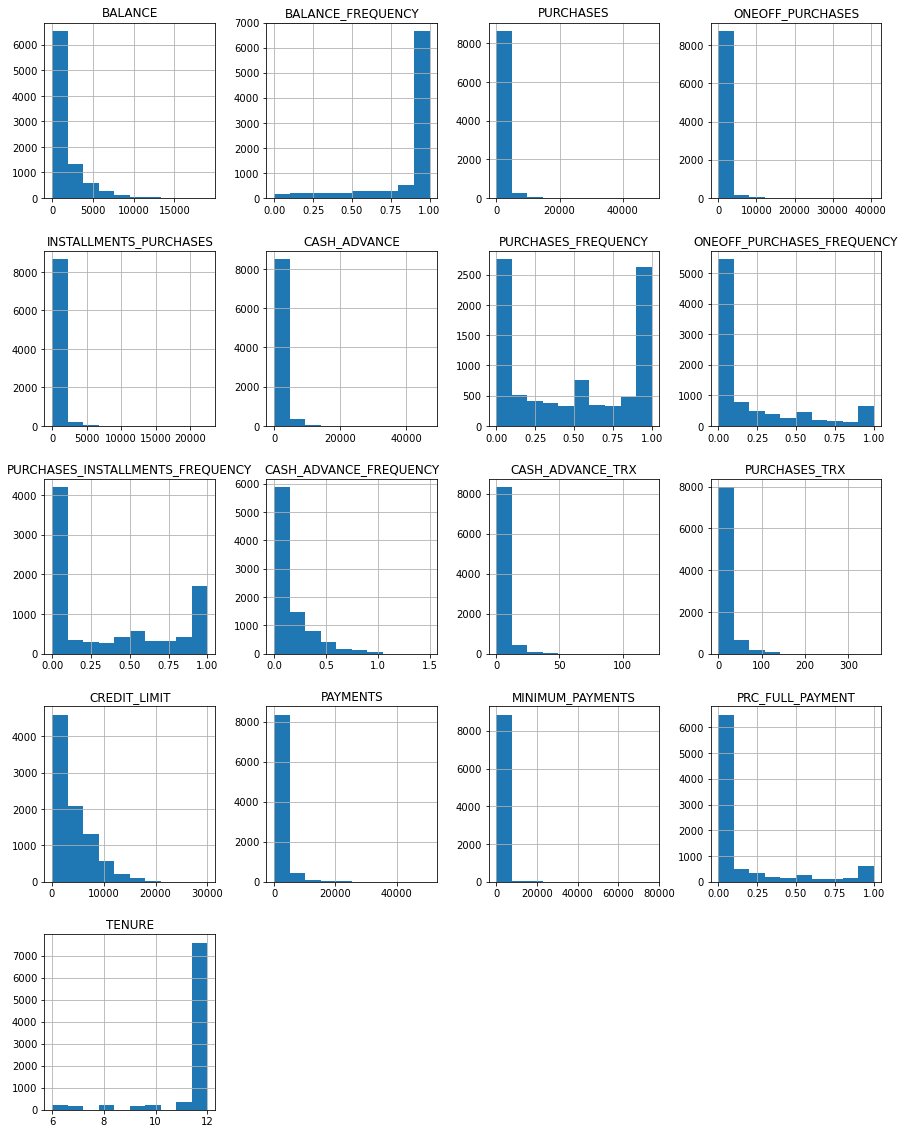

In [163]:
datacredit.hist(figsize = (15,20));


In [164]:
# after the imputation

datacredit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [165]:
datacredit.drop("CUST_ID", axis = 1, inplace = True)
datacredit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [166]:
datacredit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.043837,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.814746,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [167]:
# Data Processing

from sklearn.preprocessing import StandardScaler

escala = StandardScaler()

copiadata = escala.fit_transform(datacredit)
datacopia = pd.DataFrame(copiadata, columns= datacredit.columns)
datacopia.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960268,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688712,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826127,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826127,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905302,-0.364368,-2.657913e-01,-0.525551,0.36068


In [168]:
# Construct a model

enlaces = linkage(datacopia, method = "ward")
enlaces

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36040639e-03, 2.00000000e+00],
       ...,
       [1.78910000e+04, 1.78950000e+04, 1.51184170e+02, 3.41800000e+03],
       [1.78900000e+04, 1.78940000e+04, 1.59722203e+02, 5.53200000e+03],
       [1.78960000e+04, 1.78970000e+04, 2.04443567e+02, 8.95000000e+03]])

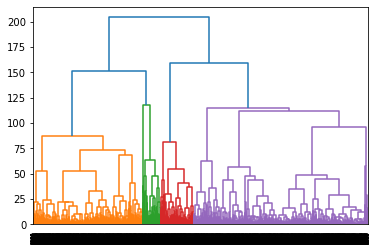

In [169]:
dendrogram(enlaces);

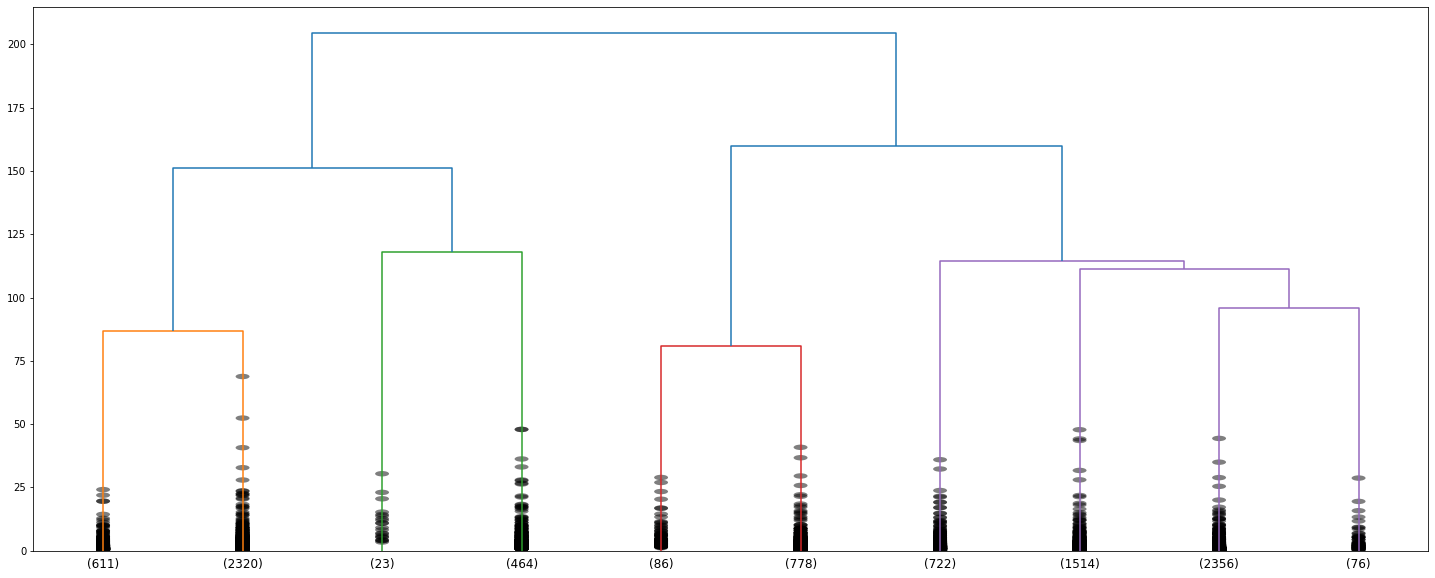

In [170]:
## let see minimized dendrogram 

plt.figure(figsize=(25,10))
dend = dendrogram(enlaces, truncate_mode="lastp", p = 10, show_leaf_counts= True, show_contracted= True) 

In [171]:
# automatic cut of the dendrogram 

from scipy.cluster.hierarchy import inconsistent

In [172]:
# inconsistent method 

depth = 5
incons = inconsistent(enlaces, depth)
incons[-10:]

array([[21.97407842, 16.58687827, 31.        ,  3.09829443],
       [23.05749656, 16.53249556, 28.        ,  3.50451442],
       [25.88667273, 20.61648886, 31.        ,  2.9564128 ],
       [21.76025867, 19.74341974, 28.        ,  3.75737336],
       [31.50763933, 24.68266662, 30.        ,  3.23612388],
       [37.02639104, 27.87719018, 31.        ,  2.77866387],
       [28.78505539, 22.40517171, 26.        ,  3.97502651],
       [40.79159594, 32.02223742, 31.        ,  3.44737229],
       [47.04766726, 34.53353805, 30.        ,  3.26275679],
       [66.87810531, 45.03141202, 31.        ,  3.05487782]])

[204.44356716 159.72220287 151.18416997 117.84620684 114.48773208
 111.38380613  95.94365809  86.83752422  80.99586571  73.36511091]
[ 36.18333139 -24.79993023  29.97948837   0.25454881 -12.33622208
   6.33401416   3.26447536  -1.78909629]


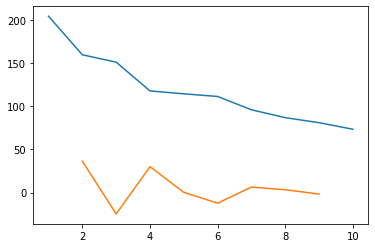

In [173]:
last = enlaces[-10:,2]
last_rev = last[::-1]
print(last_rev)

idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev)

In [174]:
# visualization of cluster 

from scipy.cluster.hierarchy import fcluster

## Put the tags in the elements 
clusteres = fcluster(enlaces, 4, criterion="maxclust")
datacredit['Cluster'] = clusteres
datacopia['Cluster'] = clusteres
datacredit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


(-5.0, 30.0)

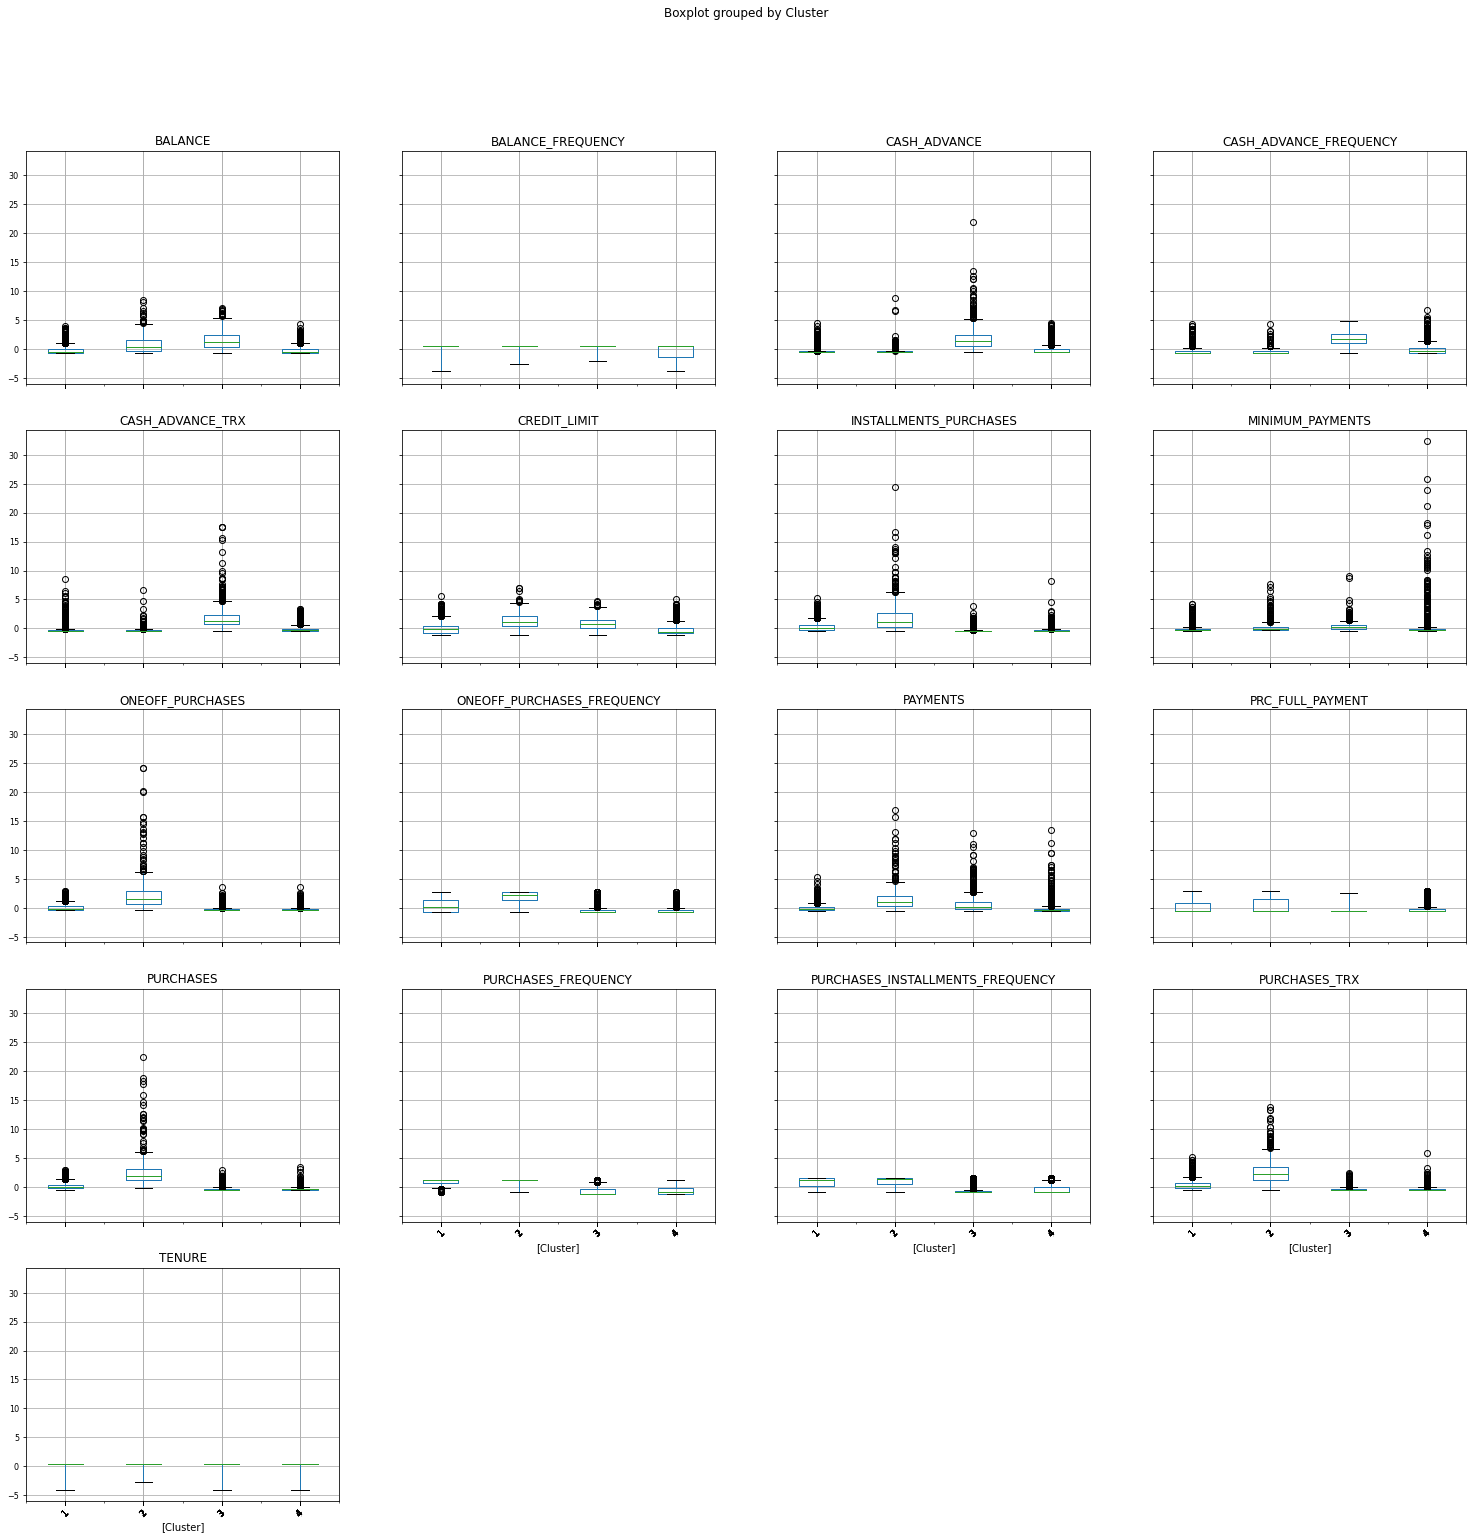

In [175]:
datacopia.boxplot(figsize = (25,25), fontsize = 8, by='Cluster', rot =45, autorange = True );
plt.ylim(-5, 30)

(-1.0, 30.0)

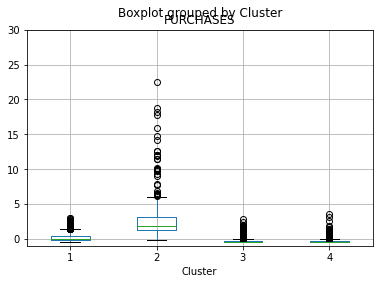

In [176]:
datacopia.boxplot(column='PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 30.0)

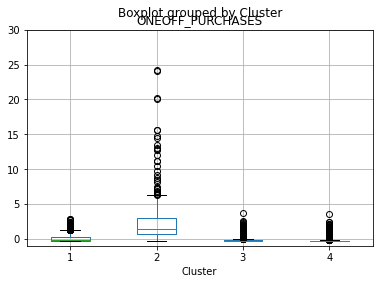

In [177]:
datacopia.boxplot(column='ONEOFF_PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 30.0)

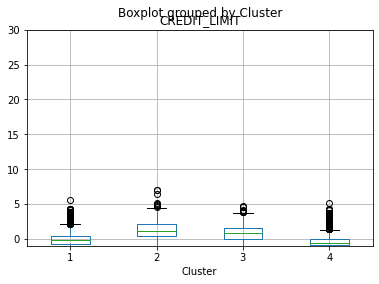

In [178]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 20.0)

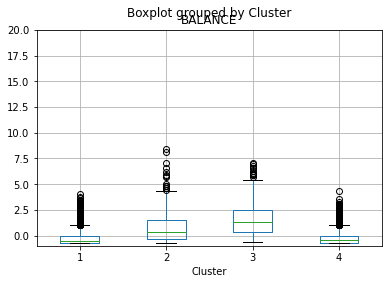

In [179]:
datacopia.boxplot(column='BALANCE', by='Cluster' )
plt.ylim(-1,20)

## (Support Vector Machine)

In [180]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

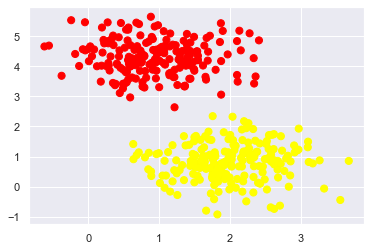

In [188]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=400, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

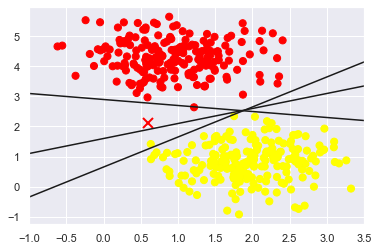

In [189]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

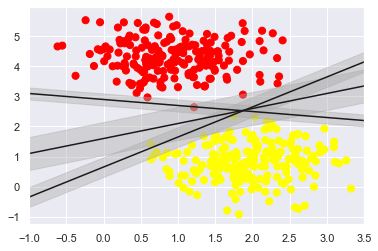

In [190]:
# draw around each line a margin of some width, up to the nearest point

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [191]:
# Fitting a support vector machine

from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [192]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

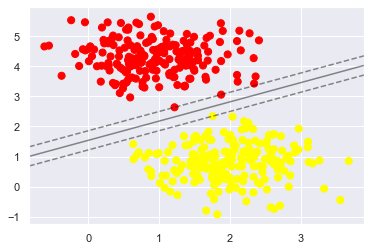

In [193]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [194]:
model.support_vectors_

array([[1.87296081, 3.06179631],
       [1.21569789, 2.64023167],
       [1.7535775 , 2.34513587]])

These 3 points, known as the support vectors, are the pivotal elements of this fit.

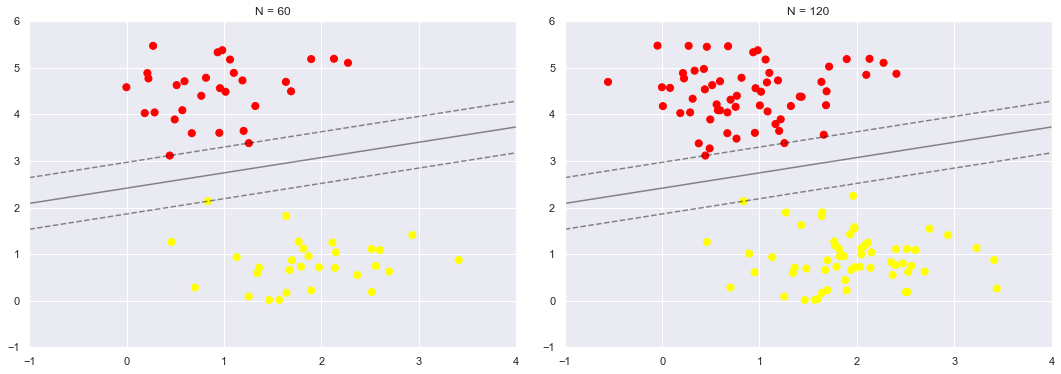

In [195]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [197]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 50, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 50, 200), value=10), Output()), _dom_classes=('wi…